In [1]:
N_dims = [256, 512, 1024,2048]
gflop = []
for N in N_dims:
    with open('run_sorken_'+str(N)+'_smgmc.txt') as f:
        print "Appending for ",N
        content = f.readlines()
        content = [line.strip() for line in content]
        content = [line.split('-')[2] for line in content]
        print "Content = ",len(content)
        content = list(map(float,content))
        content = [round(line, 5) for line in content]
        gflop.append(content)   

Appending for  256
Content =  6
Appending for  512
Content =  6
Appending for  1024
Content =  6
Appending for  2048
Content =  6


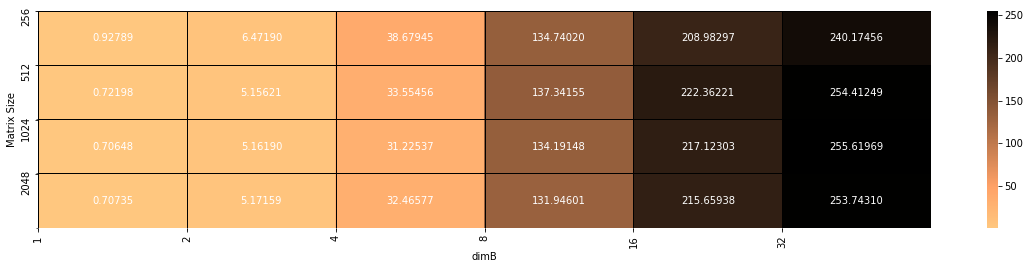

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# create some random data; replace that by your actual dataset
plt.figure(figsize=(20, 4))
colormap = plt.cm.copper_r

cols = [256,512,1024,2048]
idx = [1, 2, 4, 8, 16, 32]
gflop = np.array(gflop)
data = pd.DataFrame(np.transpose(gflop), columns=cols, index = idx)

# plot heatmap
ax = sns.heatmap(data.T, cmap=colormap)
ax.set_xlabel("dimB")
ax.set_ylabel("Matrix Size")
ax.set_xticks(np.arange(0, len(idx), 1));
ax.set_yticks(np.arange(0, len(cols), 1));

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(90)

for item in ax.get_xticklabels():
    item.set_rotation(90)
    
ax.set_xticks(np.arange(0, len(idx), 1), minor=True)
ax.set_yticks(np.arange(-.01, len(cols), 1), minor=True)

ax.grid(which='minor', color='k', linestyle='-', linewidth=1)
for y in range(gflop.shape[0]):
    for x in range(gflop.shape[1]):
        plt.text(x + 0.5, y + 0.5, '%.5f' % gflop[y, x],color='w',
                 horizontalalignment='center',
                 verticalalignment='center')
plt.savefig("heat_smgmc.png",dpi=100)
plt.show()

In [24]:
data.shape[1]

4

In [49]:
gflop = np.array(gflop[0])

In [50]:
gflop

array([  2.17864,   4.27732,   6.8276 ,   8.74055,   9.63573,  10.05964,
        10.06736,   9.27395,   9.41811,   9.21281,  10.02777,   4.33487,
         8.50489,  13.52975,  17.33677,  19.14858,  19.31189,  17.57165,
        17.76796,  17.79282,  19.41841,   8.63216,  16.8734 ,  26.78846,
        34.25111,  34.66219,  33.87216,  31.88499,  32.87944,  35.37824,
        17.04291,  33.20909,  52.57421,  58.13629,  56.91629,  55.92033,
        55.68469,  58.50825,  33.24981,  64.48808,  89.26192,  88.86233,
        87.31534,  85.81711,  90.38958,  61.73563,  74.44655,  73.14648,
        70.78532,  65.57184,  63.13278,  74.52737,  73.27749,  71.59663,
        68.72384,  64.7057 ,  73.20698,  71.3697 ,  68.66617,  65.18099,
        71.48063,  67.87043,  64.59759,  70.40359,  73.97814,  59.94645])

In [39]:
data

,256,512,1024,2048
1,0.92789,0.72198,0.70648,0.70735
2,6.47190,5.15621,5.16190,5.17159
4,38.67945,33.55456,31.22537,32.46577
8,134.74020,137.34155,134.19148,131.94601
16,208.98297,222.36221,217.12303,215.65938
32,240.17456,254.41249,255.61969,253.74310
